In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("Zomato_Kolkata_Restaurants.csv")
df.head()


,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Jyoti Vihar,https://www.zomato.com/kolkata/jyoti-vihar-cam...,South Indian,"Camac Street Area, Kolkata",Opens tomorrow at 10am,"3A/1, Ho Chi Minh Sarani, Camac Street Area, K...",+919748084091,1,1,1,1,4.4,930,4.1,5498,South Indian Delicacies,"Milk Upma, Jyoti Vihar, Vada Sambar, Filtered ...","South Indian Food, Good Crowd, Excellent Place...",300
1,WOW! Momo,https://www.zomato.com/kolkata/wow-momo-park-s...,"Momos, Fast Food, Tibetan","Park Street Area, Kolkata",9am – 3am (Today),"57, Park Street, Beside Vodafone Store, Park S...",+917604053802,1,1,1,0,4.0,469,4.1,11100,NaN,"Tandoori Paneer Momos, Momo Platter, Chocolate...","Comfortable Seating Area, Staff Service, Famil...",350
2,Zam Zam,https://www.zomato.com/kolkata/zam-zam-park-ci...,"Biryani, Rolls","Park Circus Area, Kolkata",Opens at 12noon,"28/A, Syed Amir Ali Avenue, Park Circus Area, ...",+919748710818,1,1,1,0,4.4,1901,4.3,83100,NaN,"Beef Malai, Beef Bhuna, Hariyali Chicken, Sahi...","Ordering Process, Gastronomical Experience, Co...",500
3,Daily Bhoj,https://www.zomato.com/kolkata/daily-bhoj-topsia,Bengali,"Topsia, Kolkata",NaN,"139/1G, Tljala Road, Topsia, Kolkata",+919330778809,1,0,0,0,-,0,3.9,2260,NaN,NaN,"Great Portions, Worth the Money, Timely Servic...",150
4,Behnam,https://www.zomato.com/kolkata/behnam-topsia,"Biryani, North Indian, Mughlai, Rolls, Kebab, ...","Topsia, Kolkata",Opens at 11am,"139/1G, Tiljala Road, Near OYO Townhouse 229, ...",+919330778809,1,1,0,0,-,0,2.9,151,NaN,NaN,"Worth the Money, Timely Service, Great Portion...",200


In [3]:
df.shape


(4923, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              4923 non-null   object
 1   URL               4923 non-null   object
 2   Cuisines          4923 non-null   object
 3   Area              4923 non-null   object
 4   Timing            3281 non-null   object
 5   Full_Address      4923 non-null   object
 6   PhoneNumber       4923 non-null   object
 7   IsHomeDelivery    4923 non-null   int64 
 8   isTakeaway        4923 non-null   int64 
 9   isIndoorSeating   4923 non-null   int64 
 10  isVegOnly         4923 non-null   int64 
 11  Dinner Ratings    4923 non-null   object
 12  Dinner Reviews    4923 non-null   int64 
 13  Delivery Ratings  4923 non-null   object
 14  Delivery Reviews  4923 non-null   int64 
 15  KnownFor          199 non-null    object
 16  PopularDishes     1004 non-null   object
 17  PeopleKnownFor

In [5]:
df.describe()


,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Reviews,Delivery Reviews,AverageCost
count,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000
mean,0.998984,0.685558,0.397928,0.069064,155.044079,1719.191144,341.011578
std,0.031856,0.464341,0.489520,0.253588,538.576485,5489.829779,332.619711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,150.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,147.000000,250.000000
75%,1.000000,1.000000,1.000000,0.000000,47.000000,992.000000,400.000000
max,1.000000,1.000000,1.000000,1.000000,12700.000000,142600.000000,4000.000000


In [6]:
df.isnull().sum()


Name                   0
URL                    0
Cuisines               0
Area                   0
Timing              1642
Full_Address           0
PhoneNumber            0
IsHomeDelivery         0
isTakeaway             0
isIndoorSeating        0
isVegOnly              0
Dinner Ratings         0
Dinner Reviews         0
Delivery Ratings       0
Delivery Reviews       0
KnownFor            4724
PopularDishes       3919
PeopleKnownFor      2884
AverageCost            0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)


In [9]:
print(df.columns)


Index(['Name', 'URL', 'Cuisines', 'Area', 'Timing', 'Full_Address',
       'PhoneNumber', 'IsHomeDelivery', 'isTakeaway', 'isIndoorSeating',
       'isVegOnly', 'Dinner Ratings', 'Dinner Reviews', 'Delivery Ratings',
       'Delivery Reviews', 'KnownFor', 'PopularDishes', 'PeopleKnownFor',
       'AverageCost'],
      dtype='object')


In [10]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns)


Index(['name', 'url', 'cuisines', 'area', 'timing', 'full_address',
       'phonenumber', 'ishomedelivery', 'istakeaway', 'isindoorseating',
       'isvegonly', 'dinner ratings', 'dinner reviews', 'delivery ratings',
       'delivery reviews', 'knownfor', 'populardishes', 'peopleknownfor',
       'averagecost'],
      dtype='object')


In [15]:
for col in df.columns:
    print(f"'{col}'")


'name'
'url'
'cuisines'
'area'
'timing'
'full_address'
'phonenumber'
'ishomedelivery'
'istakeaway'
'isindoorseating'
'isvegonly'
'dinner ratings'
'dinner reviews'
'delivery ratings'
'delivery reviews'
'knownfor'
'populardishes'
'peopleknownfor'
'averagecost'


In [18]:
df.columns = df.columns.str.strip().str.lower()


In [19]:
import numpy as np

rating_cols = ['dinner ratings', 'delivery ratings']

for col in rating_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].replace(['NEW', '-', 'nan', ''], np.nan)
    df[col] = df[col].str.split('/').str[0]
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [20]:
df['rating'] = df[['dinner ratings', 'delivery ratings']].mean(axis=1)


In [21]:
df[['dinner ratings', 'delivery ratings', 'rating']].head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4923 non-null   object 
 1   url               4923 non-null   object 
 2   cuisines          4923 non-null   object 
 3   area              4923 non-null   object 
 4   timing            3281 non-null   object 
 5   full_address      4923 non-null   object 
 6   phonenumber       4923 non-null   object 
 7   ishomedelivery    4923 non-null   int64  
 8   istakeaway        4923 non-null   int64  
 9   isindoorseating   4923 non-null   int64  
 10  isvegonly         4923 non-null   int64  
 11  dinner ratings    1897 non-null   float64
 12  dinner reviews    4923 non-null   int64  
 13  delivery ratings  3803 non-null   float64
 14  delivery reviews  4923 non-null   int64  
 15  knownfor          199 non-null    object 
 16  populardishes     1004 non-null   object 


In [22]:
df['rating']


0       4.25
1       4.05
2       4.35
3       3.90
4       2.90
        ... 
4918     NaN
4919     NaN
4920     NaN
4921     NaN
4922    4.40
Name: rating, Length: 4923, dtype: float64

In [24]:
df['rating'] = df['rating'].replace(['NEW', '-', ''], np.nan)
df['rating'] = df['rating'].astype(float)


In [27]:
df['averagecost'] = df['averagecost'].astype(str)
df['averagecost'] = df['averagecost'].str.replace(',', '', regex=True)
df['averagecost'] = pd.to_numeric(df['averagecost'], errors='coerce')


In [28]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [30]:
df['High_rating'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)


In [31]:
df['Cost_Category'] = pd.cut(
    df['averagecost'],
    bins=[0,300,600,1000,5000],
    labels=['Low','Medium','High','Premium']
)


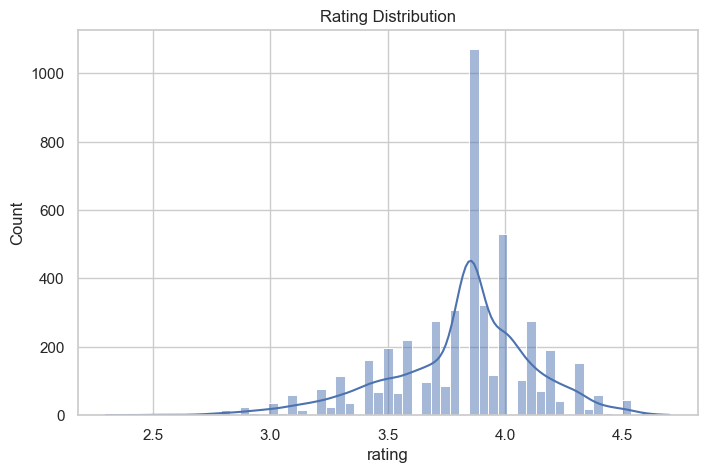

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], kde=True)
plt.title("Rating Distribution")
plt.show()


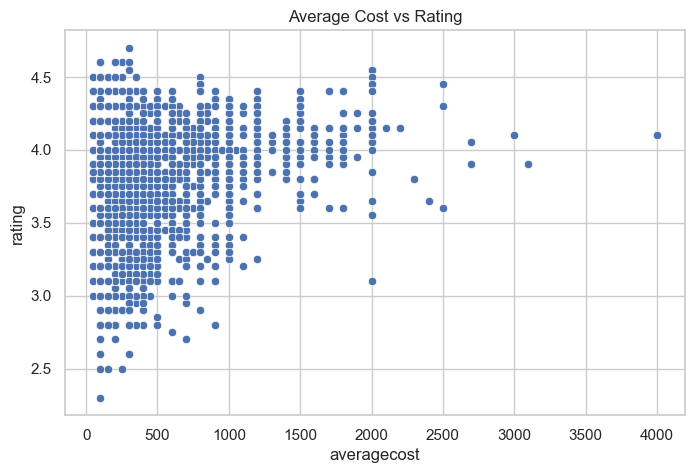

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='averagecost', y='rating', data=df)
plt.title("Average Cost vs Rating")
plt.show()


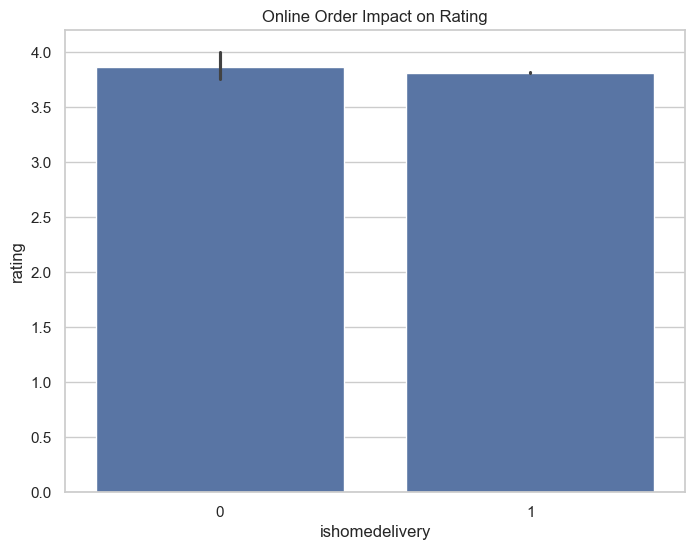

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(x='ishomedelivery', y='rating', data=df)
plt.title("Online Order Impact on Rating")
plt.show()


In [39]:
df.groupby('area')['rating'].mean().sort_values(ascending=False).head(10)


area
Silver Spring Arcade, Science City Area, Kolkata    4.362500
ITC Sonar, Science City Area, Kolkata               4.250000
Fort Knox, Camac Street Area, Kolkata               4.233333
Forum Mall, Elgin, Kolkata                          4.225000
Howard Johnson, Chinar Park, Kolkata                4.200000
Pipal Tree Hotel, New Town, Kolkata                 4.150000
Swimming Pool Chaat, Sector 1, Kolkata              4.133333
Hotel Celesta, VIP Road, Kolkata                    4.100000
The Park, Park Street, Kolkata                      4.100000
The Peerless Inn, Esplanade, Kolkata                4.100000
Name: rating, dtype: float64

In [42]:
df['cuisines'].value_counts().head(10)


cuisines
Bengali                  133
Biryani                  125
Chinese                  118
North Indian              79
Bakery, Desserts          78
North Indian, Chinese     76
Fast Food                 72
Ice Cream, Desserts       72
Biryani, North Indian     69
South Indian              68
Name: count, dtype: int64

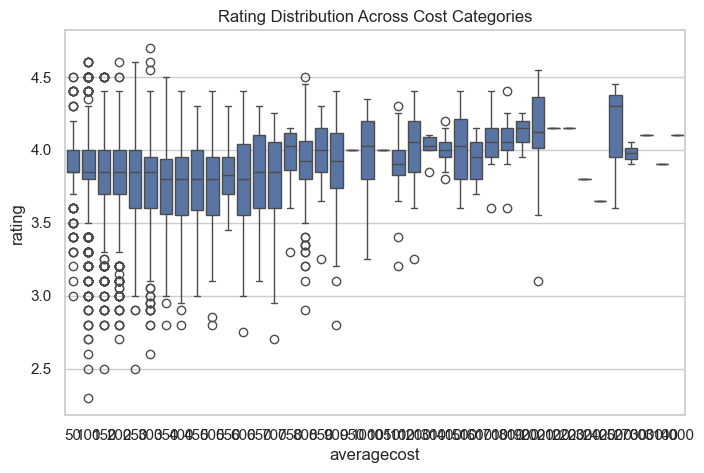

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x='averagecost', y='rating', data=df)
plt.title("Rating Distribution Across Cost Categories")
plt.show()


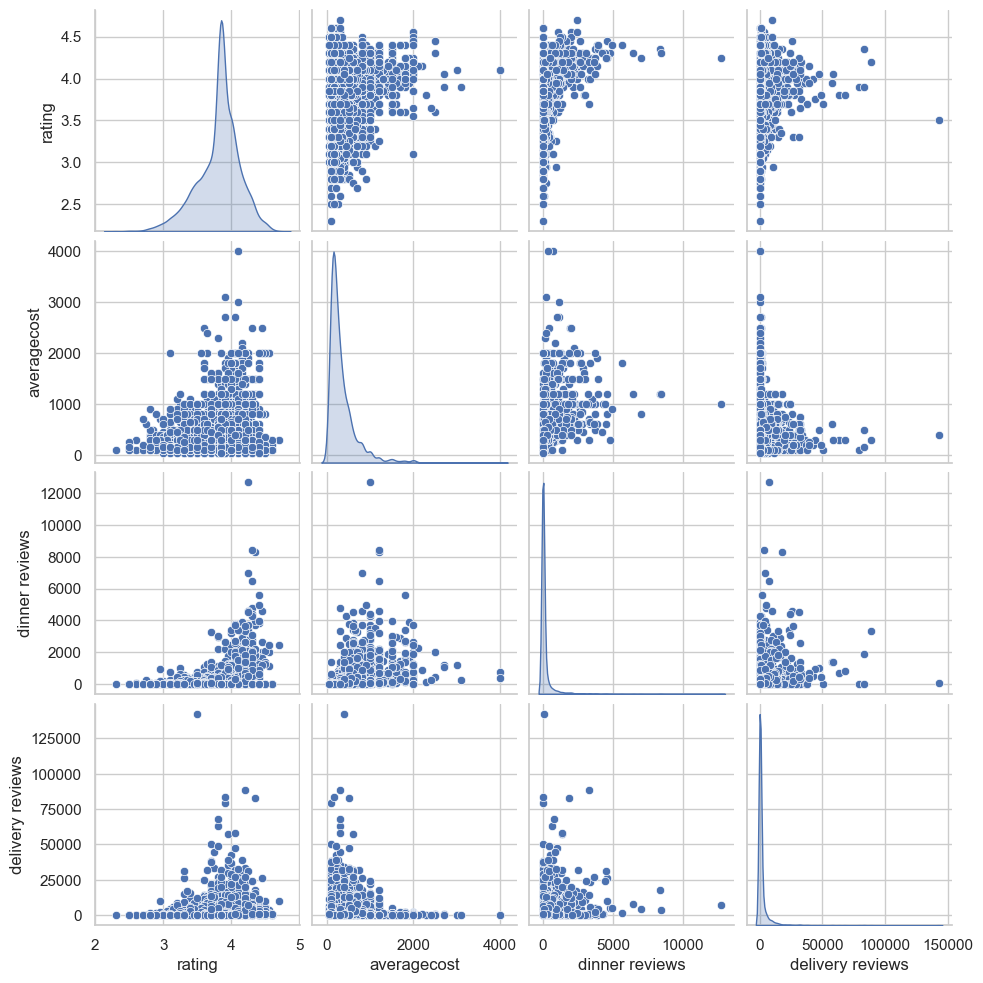

In [46]:
sns.pairplot(
    df[['rating','averagecost','dinner reviews','delivery reviews']],
    diag_kind='kde'
)


In [61]:
df['Home_Delivery_Flag'] = df['ishomedelivery'].map({'Yes':1, 'No':0})
df[['ishomedelivery','Home_Delivery_Flag']].head()



,ishomedelivery,Home_Delivery_Flag
0,1,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,1,NaN


In [62]:
df['Performance_Score'] = (
    (df['rating'] * 0.5) +
    ((df['delivery reviews'] / df['delivery reviews'].max()) * 0.3) +
    (df['Home_Delivery_Flag'] * 0.2)
)
df[['rating','delivery reviews','Home_Delivery_Flag','Performance_Score']].head()


,rating,delivery reviews,Home_Delivery_Flag,Performance_Score
0,4.25,5498,NaN,NaN
1,4.05,11100,NaN,NaN
2,4.35,83100,NaN,NaN
3,3.90,2260,NaN,NaN
4,2.90,151,NaN,NaN


In [66]:
df['Revised_rating'] = df['rating'] + (df['Home_Delivery_Flag'] * 0.2)

df[['rating', 'Home_Delivery_Flag', 'Revised_rating']].head()


,rating,Home_Delivery_Flag,Revised_rating
0,4.25,NaN,NaN
1,4.05,NaN,NaN
2,4.35,NaN,NaN
3,3.90,NaN,NaN
4,2.90,NaN,NaN


In [67]:
df['Optimized_rating'] = df.apply(
    lambda x: x['rating'] + 0.3 if x['averagecost'] < 600 else x['rating'],
    axis=1
)
df[['rating','averagecost','Optimized_rating']].head()


,rating,averagecost,Optimized_rating
0,4.25,300,4.55
1,4.05,350,4.35
2,4.35,500,4.65
3,3.90,150,4.20
4,2.90,200,3.20


In [68]:
underperforming = df[df['Performance_Score'] < df['Performance_Score'].mean()]
underperforming.head()


,name,url,cuisines,area,timing,full_address,phonenumber,ishomedelivery,istakeaway,isindoorseating,...,peopleknownfor,averagecost,rating,High_rating,Cost_Category,Online_Order_Flag,Performance_Score,Home_Delivery_Flag,Revised_rating,Optimized_rating


In [70]:
X = df[['averagecost','delivery reviews']]
y = df['rating']


In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
predictions = model.predict(X_test)
mean_absolute_error(y_test, predictions)


0.2182302263545927